# Beispiel Mietpreis: Datenvisualisierung auf Karte

## Datenbeispiel: Durchschnittlicher Mietpreis nach Zimmerzahl und Kanton

Datenquelle: Bundesamt für Statistik
Webseite Datensatz: https://opendata.swiss/de/dataset/durchschnittlicher-mietpreis-in-franken-nach-zimmerzahl-und-kanton3
Datum Download: 28.07.2025

Format: Microsoft Excel (.xlsx)

### Lesen des .xlsx-files

Zum importieren von Excel-Files kann das Modul Pandas verwendet werden.
https://pandas.pydata.org/


Installieren mit Anaconda (im Anaconda Prompt (Windows) oder Terminal (Linux oder MacOS):

    conda install pandas


#### Modul Pandas importieren

In [1]:
#Pandas importieren
import pandas as pd

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

#### Einen Teilbereich der ersten Seite einlesen 

Details zum Einlesen des Datenfiles sind im Notebook "Visualisierung mit Histogrammen..." erklärt

In [3]:
# Zweite Seite mit überspringen der Definierten Reihen einlesen
# Uebersprungene Reihen definieren mit "Skiprows"
df1s = pd.read_excel('je-d-09.03.03.01.xlsx', sheet_name="2023", header=4, skiprows=[32,33,34,35,36,37,38,39,40,41,42])

In [4]:
df1s

,Unnamed: 0,Durch-schnittlicher Mietpreis,Vertrauens-intervall : \n± (in Fr.),Durch-schnittlicher Mietpreis .1,Vertrauens-intervall : \n± (in Fr.).1,Durch-schnittlicher Mietpreis .2,Vertrauens-intervall : \n± (in Fr.).2,Durch-schnittlicher Mietpreis .3,Vertrauens-intervall : \n± (in Fr.).3,Durch-schnittlicher Mietpreis .4,Vertrauens-intervall : \n± (in Fr.).4,Durch-schnittlicher Mietpreis .5,Vertrauens-intervall : \n± (in Fr.).5,Durch-schnittlicher Mietpreis .6,Vertrauens-intervall : \n± (in Fr.).6
0,Schweiz,1451,3,872,8,1182,6,1410,5,1670,6,2016,14,2514,44
1,Zürich,1722,9,1054,22,1461,16,1681,13,1971,16,2404,39,3000,145
2,Bern,1297,8,779,23,1053,15,1244,11,1512,15,1804,37,2283,127
3,Luzern,1452,10,828,26,1168,18,1395,14,1596,15,1954,39,2383,106
4,Uri,1260,49,678,87,1009,95,1174,80,1372,76,1577,168,1848,281
5,Schwyz,1695,32,861,86,1283,53,1647,50,1854,47,2278,104,2801,476
6,Obwalden,1383,52,679,164,1100,101,1328,65,1558,77,1814,144,2225,420
7,Nidwalden,1528,57,737,108,1162,81,1449,67,1787,70,2074,265,2235,358
8,Glarus,1213,49,741,184,968,90,1153,67,1349,64,1744,142,1996,594
9,Zug,1931,24,929,53,1465,43,1813,33,2183,33,2661,74,3391,300


## Visualisierung der Daten auf einer Karte

Die Mietpreise der Schweiz werden auf einer Schweizer Karte angezeigt. Dazu ist die Kombination mit entsprechende Geodaten notwendig.

#### Module für die Visualisierung importieren: Geopandas und Matplotlib

Matplotlib wird weitering benötigt.

In [5]:
# Matplotlib zum erstellen der Grafiken
import matplotlib.pyplot as plt

Geographische Visualisierung der Daten mit GeoPandas:
    
[https://geopandas.org](https://geopandas.org)
    
Installation (Anaconda):
    
    conda install geopandas

In [6]:
# Geopandas importieren
import geopandas as gpd

#### Benötigte Geodaten bereit stellen

Zur Visualisierung auf einer Karte müssen die entsprechenden Koordinaten verfügbar sein. Hier brauchen wir eine Karte der Schweiz mit den Kantonsgrenzen, damit wir die durchschnittlichen Mietpreise für jeden Kanton eintragen können. Die entsprechenden Geodaten werden vom Bundesamt für Landestopografie swisstopo zur Verfügung gestellt und können beim Geoportal des Bundes bezogen werden:

https://data.geo.admin.ch

Die zur Verfügung gestellten .shp-files können zu .geojson konvertiert werden. Dazu wird das tool 'ogr2ogr' in der commandline mit folgendem Befehl aufgerufen:
    
ogr2ogr -f GeoJSON -t_srs EPSG:4326 -simplify 1000 switzerland.geojson swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp

Das tool 'ogr2ogr' ist teil GDAL-package https://pypi.org/project/GDAL/ die zusammen mit GeoPandas installiert wird.


## Geodaten Visualisieren: Kartendarstellung von .geojson-Files

In [7]:
# GeoJson-file mit GeoPandas importieren und anzeigen
geo_df = gpd.read_file('switzerland.geojson')
print (geo_df.columns)
geo_df.head()

Index(['UUID', 'DATUM_AEND', 'DATUM_ERST', 'ERSTELL_J', 'ERSTELL_M',
       'REVISION_J', 'REVISION_M', 'GRUND_AEND', 'HERKUNFT', 'HERKUNFT_J',
       'HERKUNFT_M', 'OBJEKTART', 'REVISION_Q', 'ICC', 'KANTONSNUM',
       'SEE_FLAECH', 'KANTONSFLA', 'KT_TEIL', 'NAME', 'EINWOHNERZ',
       'geometry'],
      dtype='object')


,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2023,1,Verbessert,AV,2019,...,Kanton,sb3D_2022_Akt,CH,18,NaN,710530.0,0,Graubünden,201376.0,"POLYGON Z ((9.18824 46.87643 2716.238, 9.2489 ..."
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,2,11854.0,595850.0,1,Bern,1047422.0,"POLYGON Z ((7.35728 46.63928 1809.436, 7.38021..."
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2022-11-14,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,23,1060.0,522464.0,0,Valais,353209.0,"POLYGON Z ((7.43339 46.38508 2558.825, 7.53797..."
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,22,38937.0,321202.0,1,Vaud,822968.0,"POLYGON Z ((6.88513 46.37561 373.381, 6.82168 ..."
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,21,7122.0,281215.0,0,Ticino,352181.0,"POLYGON Z ((9.08906 46.21237 1351.527, 9.15863..."


#### Kartendarstellung: Kantone und Kantonsgrenzen

Das .geojson-File enthält Informationen zu Kantonen und Kantonsgrenzen; diese können visualisiert werden.

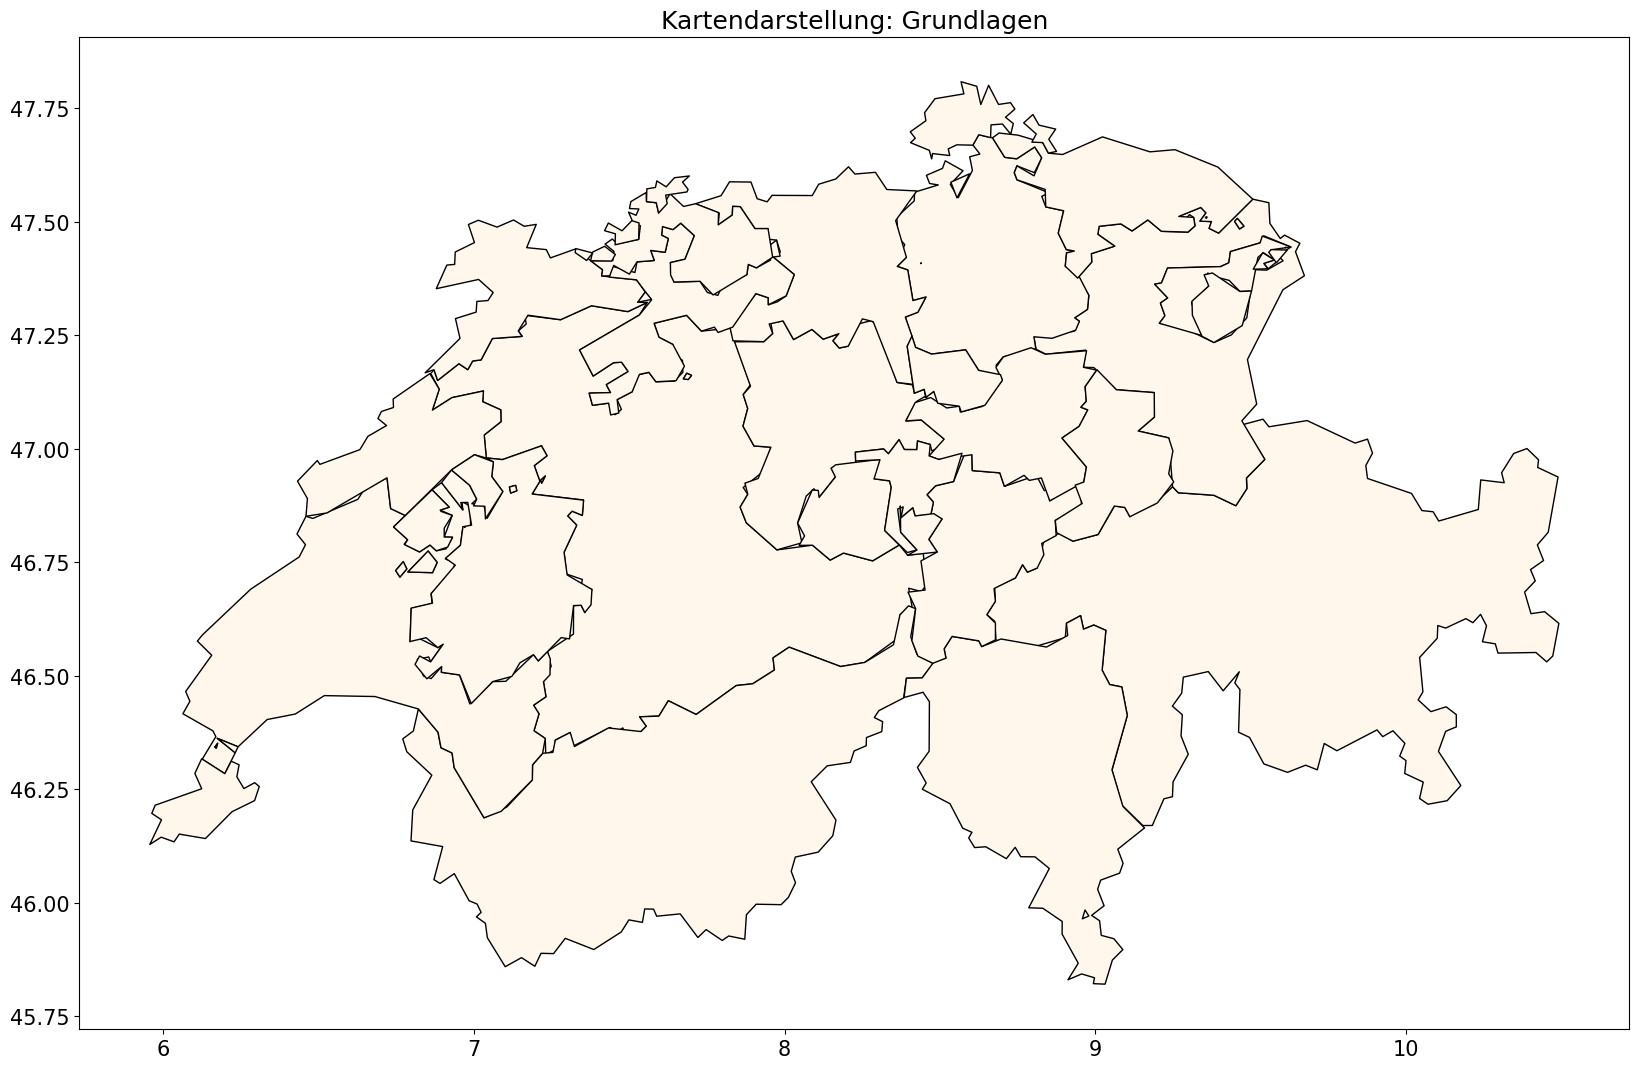

In [8]:
# basic map plot
plt.rcParams.update({'font.size': 15}) # Schriftgrösse definieren
fig, ax = plt.subplots(figsize=(20,20)) # Plots initialisieren
geo_df.plot(ax=ax, column='ERSTELL_J', cmap='OrRd', edgecolor='black') # Karte anzeigen
ax.set_title('Kartendarstellung: Grundlagen') # Titel setzen
plt.show()

#### Kartendarstellung: Einwohnerzahl der Kantone als Heatmap

Zusätzlich entählt das .geojson-File Informationen zur Einwohnerzahl und anderen Kenndaten der Kantone. Die Einwohnerzahl kann als Heatmap auf der Karte angezeigt werden.

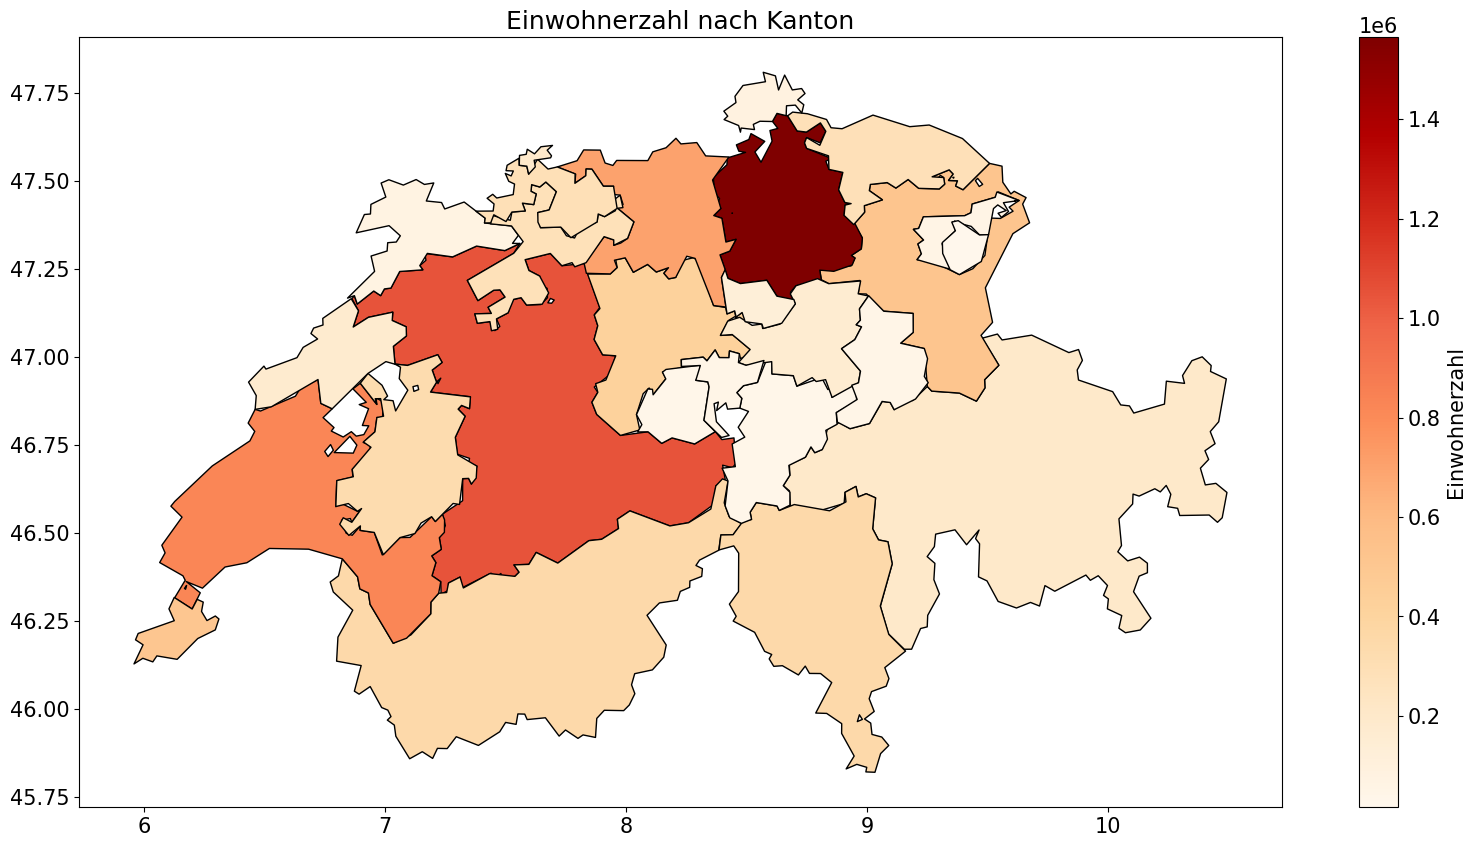

In [9]:
# Karte mit Kantonsgrenze; Einwohnerzahl als Heatmap
fig, ax = plt.subplots(figsize=(20,10)) # Grfik und Grösse definieren
geo_df.plot(ax=ax, column='EINWOHNERZ', cmap='OrRd', edgecolor='black', legend=True, legend_kwds={"label": "Einwohnerzahl"}) # Karte mit Heatmap (cmap)
ax.set_title('Einwohnerzahl nach Kanton') # Titel festlegen
plt.show()

## Geodatenfile Analysieren und Kantonsnamen den Namen im Mietpreis-File zuordnen

In [10]:
# Anzahl Zeilen im Geodatensatz anzeigen
geo_df.shape

(50, 21)

Im Geodatensatz sind mehr Zeilen als Kantone (für viele Kantone sind meherere Einträge enthalten). Um die Kantonsnamen zu vergleichen sollte für jeden Kanton nur ein Eintrag vorhanden sein. Dies kann hier durch weglassen aller Zeilen mit Kantonsfläche 'nan' (not a number) erreicht werden, da dann nur der Haupteintrag für jeden Kanton ausgewählt wird.

In [11]:
# Neuen Dataframe erstellen ohne Einträge mit geo_df['KANTONSFLA'] = nan 
geo_notna = geo_df[geo_df['KANTONSFLA'].notna()]

In [12]:
geo_notna.shape

(26, 21)

Wir haben jetzt in geo_notna für jeden Kanton einen Eintrag gespeichert und können ihn anzeigen lassen:

In [13]:
# Vergleich der Kantonsnamen nach Index in beiden sortierten Dataframes
for item in geo_notna['NAME']:
    print(item)

Graubünden
Bern
Valais
Vaud
Ticino
St. Gallen
Zürich
Fribourg
Luzern
Aargau
Uri
Thurgau
Schwyz
Jura
Neuchâtel
Solothurn
Glarus
Basel-Landschaft
Obwalden
Nidwalden
Genève
Schaffhausen
Appenzell Ausserrhoden
Zug
Appenzell Innerrhoden
Basel-Stadt


Die Kantonsnamen sind anders als im Datensatz der Mietpreise: Namen sind anders abgekürzt und in der jeweiligen Sprache des Kantons geschrieben.  Um die Geodaten der Kantone den Mietpreisen zuzuordnen muss jeder Kantonname eine Entsprechung haben. Dies erreichten wir in zwei Schritten:

    1. Alphabetische Sortierung der Kantonsnamen
    2. Übersetzung einiger Kantonsnamen, bis die Namen korrekt zugeordnet werden können

Die Zuordnung kann auf verschiedene Arten gelöst werden, z.B. auch mithilfe eines Übersetzungsmoduls. Diese Lösung hier ist sehr einfach, aber nicht systematisch.

#### Sortieren der Kantonsnamen und Übersetzung für die richtige Zuordnung der Einträge
Für das sortieren steht in Pandas/Geopandas die Funktion sort_values() zur Verfügung. Die Funktionalität ist analog der sort_values-Funktion in Pandas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [14]:
# Sortieren der Geodaten nach Kantonsnamen
geo_sort = geo_notna.sort_values('NAME',ignore_index=True)

In [15]:
# Sortieren der Mietpreise nach Kantonsnamen und Weglassen des Eintrags für die Schweiz
df1s_sorted = df1s[1:].sort_values('Unnamed: 0',ignore_index=True)

In [16]:
# Vergleich der Kantonsnamen nach Index in beiden sortierten Dataframes
for num in range(df1s_sorted.shape[0]):
    print(num, geo_sort['NAME'][num],"\t", df1s_sorted['Unnamed: 0'][num])

0 Aargau 	 Aargau
1 Appenzell Ausserrhoden 	 Appenzell A.Rh.
2 Appenzell Innerrhoden 	 Appenzell I.Rh.
3 Basel-Landschaft 	 Basel-Landschaft
4 Basel-Stadt 	 Basel-Stadt
5 Bern 	 Bern
6 Fribourg 	 Freiburg
7 Genève 	 Genf
8 Glarus 	 Glarus
9 Graubünden 	 Graubünden
10 Jura 	 Jura
11 Luzern 	 Luzern
12 Neuchâtel 	 Neuenburg
13 Nidwalden 	 Nidwalden
14 Obwalden 	 Obwalden
15 Schaffhausen 	 Schaffhausen
16 Schwyz 	 Schwyz
17 Solothurn 	 Solothurn
18 St. Gallen 	 St.Gallen
19 Thurgau 	 Tessin
20 Ticino 	 Thurgau
21 Uri 	 Uri
22 Valais 	 Waadt
23 Vaud 	 Wallis
24 Zug 	 Zug
25 Zürich 	 Zürich


Die Indices der Kantone stimmen in vier Fällen nicht überein. Dies kann gelöst werden, wenn zwei der Namen ersetzt werden und anschliessend nochmals sortiert wird. 

In [17]:
# Ersetzung Nr. 1
df1s_r = df1s_sorted.replace({'Unnamed: 0': {'Wallis': 'Valais'}})

In [18]:
# Ersetzung Nr. 2
df1sr = df1s_r.replace({'Unnamed: 0': {'Tessin': 'Ticino'}})

In [19]:
# Neue sortierung
df1sr_sorted = df1sr.sort_values('Unnamed: 0',ignore_index=True)

In [20]:
df1sr_sorted.shape

(26, 15)

In [21]:
# Überprüfen der Entsprechung und Speichern der entsprechenden Indices in der Liste m_kanton
m_kanton = []
for num in range(df1sr_sorted.shape[0]): # Ausgabe der Kantonsnamen in beiden Listen  und Mietpreis
    print(num,'\t\t', geo_sort['NAME'][num],' : ', df1sr_sorted['Unnamed: 0'][num], '\t\t\t\t\t', df1sr_sorted['Durch-schnittlicher Mietpreis '][num]) 
    m_kanton.append(geo_sort['NAME'][num]) # Index speichern

0 		 Aargau  :  Aargau 					 1456
1 		 Appenzell Ausserrhoden  :  Appenzell A.Rh. 					 1226
2 		 Appenzell Innerrhoden  :  Appenzell I.Rh. 					 1346
3 		 Basel-Landschaft  :  Basel-Landschaft 					 1489
4 		 Basel-Stadt  :  Basel-Stadt 					 1412
5 		 Bern  :  Bern 					 1297
6 		 Fribourg  :  Freiburg 					 1287
7 		 Genève  :  Genf 					 1529
8 		 Glarus  :  Glarus 					 1213
9 		 Graubünden  :  Graubünden 					 1330
10 		 Jura  :  Jura 					 981
11 		 Luzern  :  Luzern 					 1452
12 		 Neuchâtel  :  Neuenburg 					 1070
13 		 Nidwalden  :  Nidwalden 					 1528
14 		 Obwalden  :  Obwalden 					 1383
15 		 Schaffhausen  :  Schaffhausen 					 1265
16 		 Schwyz  :  Schwyz 					 1695
17 		 Solothurn  :  Solothurn 					 1251
18 		 St. Gallen  :  St.Gallen 					 1321
19 		 Thurgau  :  Thurgau 					 1344
20 		 Ticino  :  Ticino 					 1225
21 		 Uri  :  Uri 					 1260
22 		 Valais  :  Valais 					 1206
23 		 Vaud  :  Waadt 					 1444
24 		 Zug  :  Zug 					 1931
25 		 Zürich  :  Zürich 			

Die Kantonsnamen sind nun in beiden Listen gleich geordnet. Dadurch kann jeder Eintrag einem Kanton zugeordnet und entsprechend dargestellt werden. Die Zuordnung ist als Indes in der Liste m_kanton gespeichert

In [22]:
# Index eines Kantons ausgeben lassen
m_kanton.index('Zug')

24

In [23]:
# Mietpreis eines Kantons ausgeben lassen
df1sr_sorted['Durch-schnittlicher Mietpreis '][m_kanton.index('Zug')]

np.int64(1931)

## Visualisierung der Mietpreise auf der Karte

Für die Visualisierung der Mietpreise wird eine Liste mit dem Mietpreis für jeden Kanton im ursprünglichen Dataframe geo_df erstellt. 

In [24]:
# Mietpreis für jeden Kanton im Geodatenframe nach Namen auswählen und in der Liste miet_geo speichern
miet_geo = []
for item in geo_df['NAME']:
    #print(item, m_kanton.index(item))
    miet_geo.append(df1sr_sorted['Durch-schnittlicher Mietpreis '][m_kanton.index(item)])
#miet_geo

In [25]:
# Transformieren der Liste in ein Dataframe
df_miet_geo = pd.DataFrame(miet_geo,columns =['Miete'])

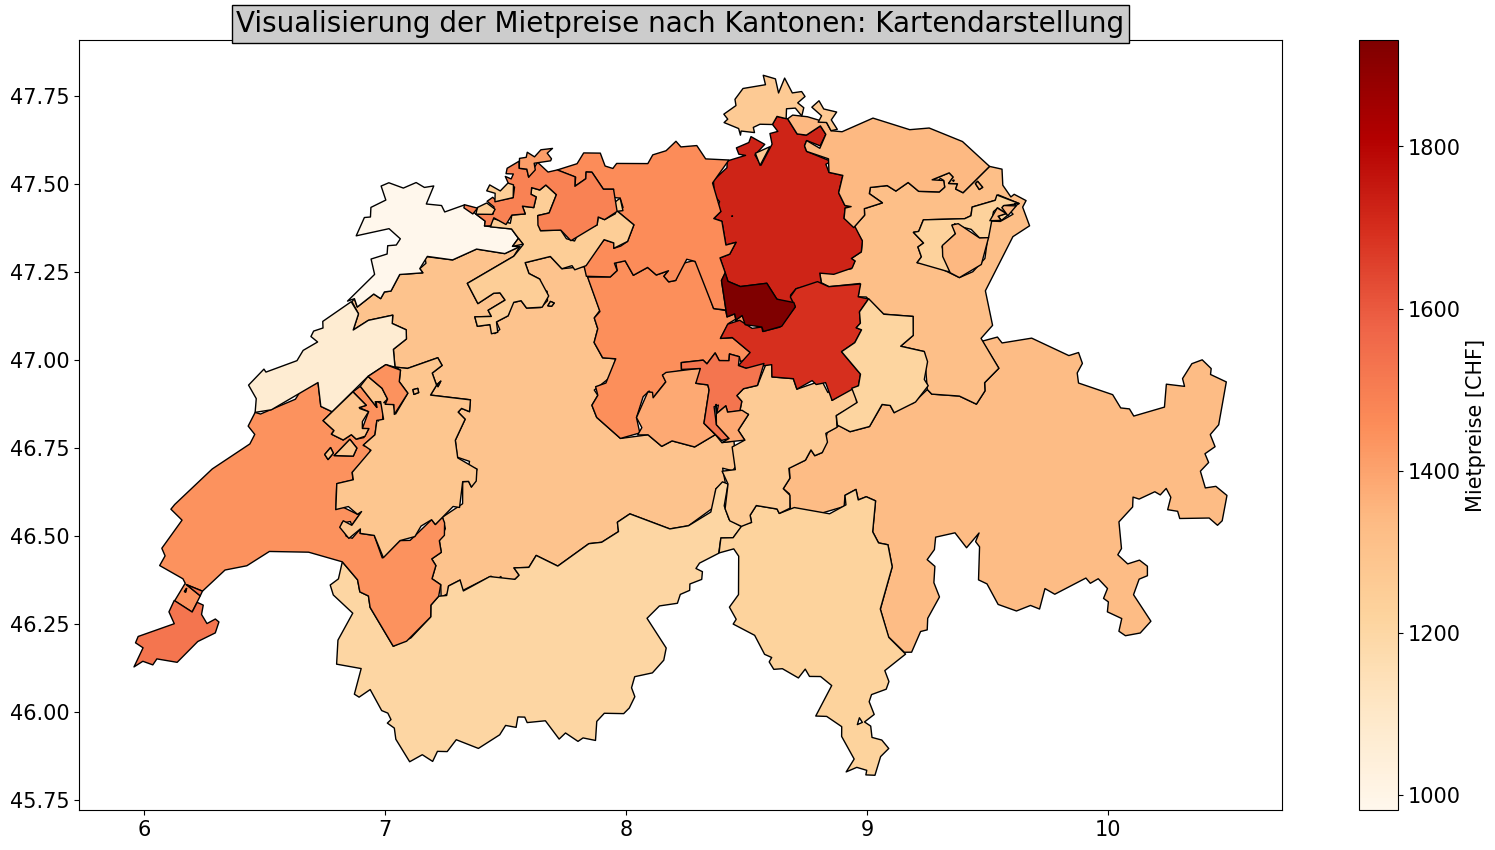

In [26]:
# Karte mit Kantonsgrenze; Einwohnerzahl als Heatmap
fig, ax = plt.subplots(figsize=(20,10)) # Grösse festlegen
ax.set_title('Visualisierung der Mietpreise nach Kantonen: Kartendarstellung', 
             bbox={'facecolor':'0.8', 'pad':3}, fontsize=20) # Titel festlegen
geo_df.plot(ax=ax, column=df_miet_geo['Miete'], cmap='OrRd', edgecolor='black', legend=True, legend_kwds={"label": "Mietpreise [CHF]"}) # Karte mit Heatmap (cmap)
plt.savefig('Mietpreis_Karte.png', bbox_inches='tight') # Grafik als .png speichern
plt.show()

Dies ist eine sehr einfache Kartendarstellung. Grundsätzlich können Geodatensätze vielfältig mit anderen Daten kombiniert werden. Zudem gibt es noch weitere Darstellungsmöglichkeiten, z.B. interaktive Karten. 

Weitere Beispiele mit Geopandas: https://geopandas.org/en/stable/getting_started/introduction.html